In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from matplotlib.ticker import FuncFormatter
import matplotlib.animation as animation
import os

In [70]:
def processar_arquivo_csv(caminho_entrada, caminho_saida):
    """
    Lê um arquivo CSV, remove linhas inválidas, 
    formata valores (vírgula → ponto, 'i' → 'j') 
    e salva no arquivo de saída.
    """
    try:
        linhas_validas = []
        with open(caminho_entrada, 'r', encoding='utf-8') as f_entrada:
            for linha in f_entrada:
                if not linha.strip() or ';;;;' in linha:
                    continue  # ignora linhas inválidas
                
                colunas = linha.strip().split(';')
                colunas_formatadas = []
                for i, valor in enumerate(colunas):
                    if i == 2:  # coluna de números complexos
                        valor_formatado = valor.replace(',', '.').replace('i', 'j')
                    else:
                        valor_formatado = valor.replace(',', '.')
                    colunas_formatadas.append(valor_formatado)
                
                linhas_validas.append('  '.join(colunas_formatadas) + '\n')

        # Salva apenas se houver algo válido
        if linhas_validas:
            with open(caminho_saida, 'w', encoding='utf-8') as f_saida:
                f_saida.writelines(linhas_validas)
            return True
        return False

    except Exception as e:
        print(f" -> Erro ao processar '{os.path.basename(caminho_entrada)}': {e}")
        return False


def processar_arquivos_na_pasta(caminho_da_pasta):
    """
    Processa todos os arquivos .csv que começam com 'Medida':
    - Remove linhas inválidas
    - Formata dados e gera novo arquivo com sufixo '-formatado'
    """
    print(f"Iniciando o processamento na pasta: '{caminho_da_pasta}'\n")
    
    if not os.path.isdir(caminho_da_pasta):
        print(f"Erro: O caminho '{caminho_da_pasta}' não é uma pasta válida.")
        return

    arquivos_processados = 0
    arquivos_encontrados = 0
    arquivos_ignorados = 0
    
    for nome_arquivo in os.listdir(caminho_da_pasta):
        if nome_arquivo.startswith('Medida') and nome_arquivo.endswith('.csv'):
            # --- ALTERAÇÃO 1: MUDANÇA NA VERIFICAÇÃO ---
            if '-formatado' in nome_arquivo:
                arquivos_ignorados += 1
                continue

            arquivos_encontrados += 1
            caminho_entrada = os.path.join(caminho_da_pasta, nome_arquivo)
            
            nome_base, extensao = os.path.splitext(nome_arquivo)
            # --- ALTERAÇÃO 2: MUDANÇA NO NOME DO ARQUIVO DE SAÍDA ---
            caminho_saida = os.path.join(caminho_da_pasta, f"{nome_base}-formatado{extensao}")
            
            print(f"Processando '{nome_arquivo}'...")
            if processar_arquivo_csv(caminho_entrada, caminho_saida):
                arquivos_processados += 1
                print(f" -> Salvo como '{os.path.basename(caminho_saida)}'")
    
    print("\n--- Resumo da Operação ---")
    if arquivos_encontrados == 0 and arquivos_ignorados == 0:
        print("Nenhum arquivo .csv começando com 'Medida' foi encontrado.")
    else:
        print(f"Total de arquivos encontrados: {arquivos_encontrados + arquivos_ignorados}")
        print(f"Arquivos a processar: {arquivos_encontrados}")
        print(f"Arquivos ignorados (já formatados): {arquivos_ignorados}")
        print(f"Arquivos processados com sucesso: {arquivos_processados}")
    print("--------------------------")


# --- MODO DE USAR ---
pasta_alvo = "Gráficos para apresentação"
processar_arquivos_na_pasta(pasta_alvo)

Iniciando o processamento na pasta: 'Gráficos para apresentação'

Processando 'Medida-7-L.A.Vd-18.09.2025.csv'...
 -> Salvo como 'Medida-7-L.A.Vd-18.09.2025-formatado.csv'

--- Resumo da Operação ---
Total de arquivos encontrados: 2
Arquivos a processar: 1
Arquivos ignorados (já formatados): 1
Arquivos processados com sucesso: 1
--------------------------


In [71]:
plt.style.use("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto 3/joao.mplstyle")
# --- DEFINIÇÃO DO TEMA GLOBAL USANDO rcParams ---
plt.rcParams['figure.figsize'] = (20, 12) # Define o tamanho da figura para 10x6 polegadas
plt.rcParams['font.size'] = 14           # Define o tamanho da fonte geral como 14
plt.rcParams['axes.titlesize'] = 30      # Tamanho da fonte do título
plt.rcParams['axes.labelsize'] = 20      # Tamanho da fonte dos rótulos dos eixos
plt.rcParams['axes.grid'] = False        # Habilita/desabilita a grade em todos os gráficos
# plt.rcParams['grid.linestyle'] = '-'      # Estilo da grade: tracejado
plt.rcParams['grid.alpha'] = 0.6         # Transparência da grade
plt.rcParams['savefig.dpi'] = 700        # Alta resolução para salvar as figuras
plt.rcParams['lines.linestyle'] = '-'    # Linha sólida
plt.rcParams['lines.linewidth'] = 2.5   # Espessura da linha
plt.rcParams['figure.facecolor'] = 'none'   # Fundo da figura transparente
plt.rcParams['axes.facecolor']   = 'none'   # Fundo dos eixos transparente
plt.rcParams['savefig.facecolor'] = 'none'  # Ao salvar, mantém transparente
plt.rcParams['savefig.transparent'] = True  # Salva figuras com fundo transparente
plt.rcParams['xtick.labelsize'] = 16    # Tamanho dos rótulos do eixo x
plt.rcParams['ytick.labelsize'] = 16    # Tamanho dos rótulos do eixo y
# ---------------------------------------------------


Missing colon in file '/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto 3/joao.mplstyle', line 617 ('view raw')
Missing colon in file '/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto 3/joao.mplstyle', line 618 ('matplotlibrc hosted with ❤ by GitHub')


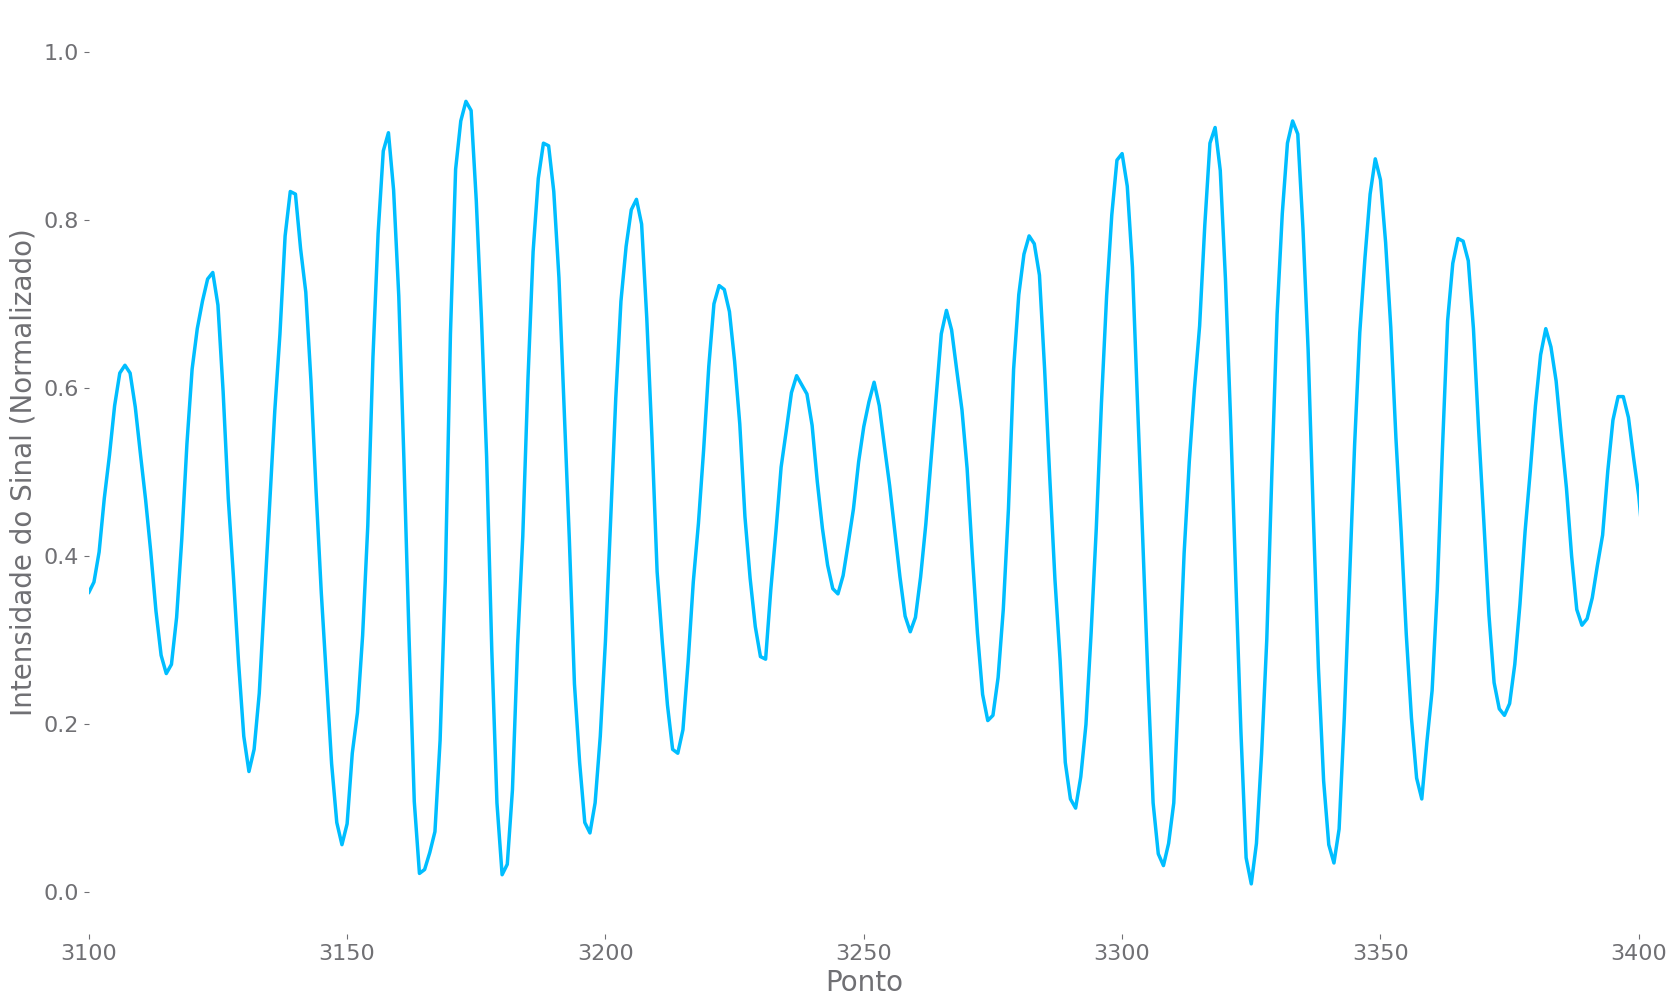

Gráfico salvo como 'interferograma_normalizado.png' com sucesso!
A coluna 'sinal_normalizado' foi adicionada ao DataFrame.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo (ajuste se necessário)
caminho_do_arquivo = 'Gráficos para apresentação/Medida-7-L.A.Vd-18.09.2025-formatado.csv'

# Lê o arquivo CSV
df = pd.read_csv(caminho_do_arquivo, sep='  ', header=None, engine='python')

# Atribui os nomes às colunas
df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']

# --- INÍCIO DA NORMALIZAÇÃO MIN-MAX ---

# 1. Encontra o valor mínimo e máximo da coluna 'sinal'
sinal_min = df['sinal'].min()
sinal_max = df['sinal'].max()

# 2. Aplica a fórmula e cria uma nova coluna com os dados normalizados
df['sinal_normalizado'] = (df['sinal'] - sinal_min) / (sinal_max - sinal_min)

# --- FIM DA NORMALIZAÇÃO ---


# Cria a figura para o gráfico
# plt.figure(figsize=(12, 7))

# 3. Altera a plotagem para usar a nova coluna 'sinal_normalizado' no eixo y
plt.plot(df['ponto'], df['sinal_normalizado'])

# Define o título do gráfico
# plt.title("Interferograma Normalizado - Laseres Hélio-Neónio: Vermelho (632.8 nm) - Amarelo (594.1 nm)")

# Define os rótulos dos eixos
plt.xlabel('Ponto')
plt.xlim(3100, 3400)

# 4. Atualiza o rótulo do eixo y para indicar que os dados foram normalizados
plt.ylabel('Intensidade do Sinal (Normalizado)')

# Salva a figura
nome_saida = "interferograma_normalizado.png"
plt.show()
plt.savefig(nome_saida)
plt.close()

print(f"Gráfico salvo como '{nome_saida}' com sucesso!")
print("A coluna 'sinal_normalizado' foi adicionada ao DataFrame.")

Picos encontrados em lambda: [594.19, 532.03]
Com alturas normalizadas: [0.77, 1.0]


<>:72: SyntaxWarning: invalid escape sequence '\l'
<>:72: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_4914/1089160095.py:72: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Comprimento de Onda ($\lambda$) [nm]')


Gráfico salvo como 'ft_abs_norm_com_picos_anotados.png' com sucesso!


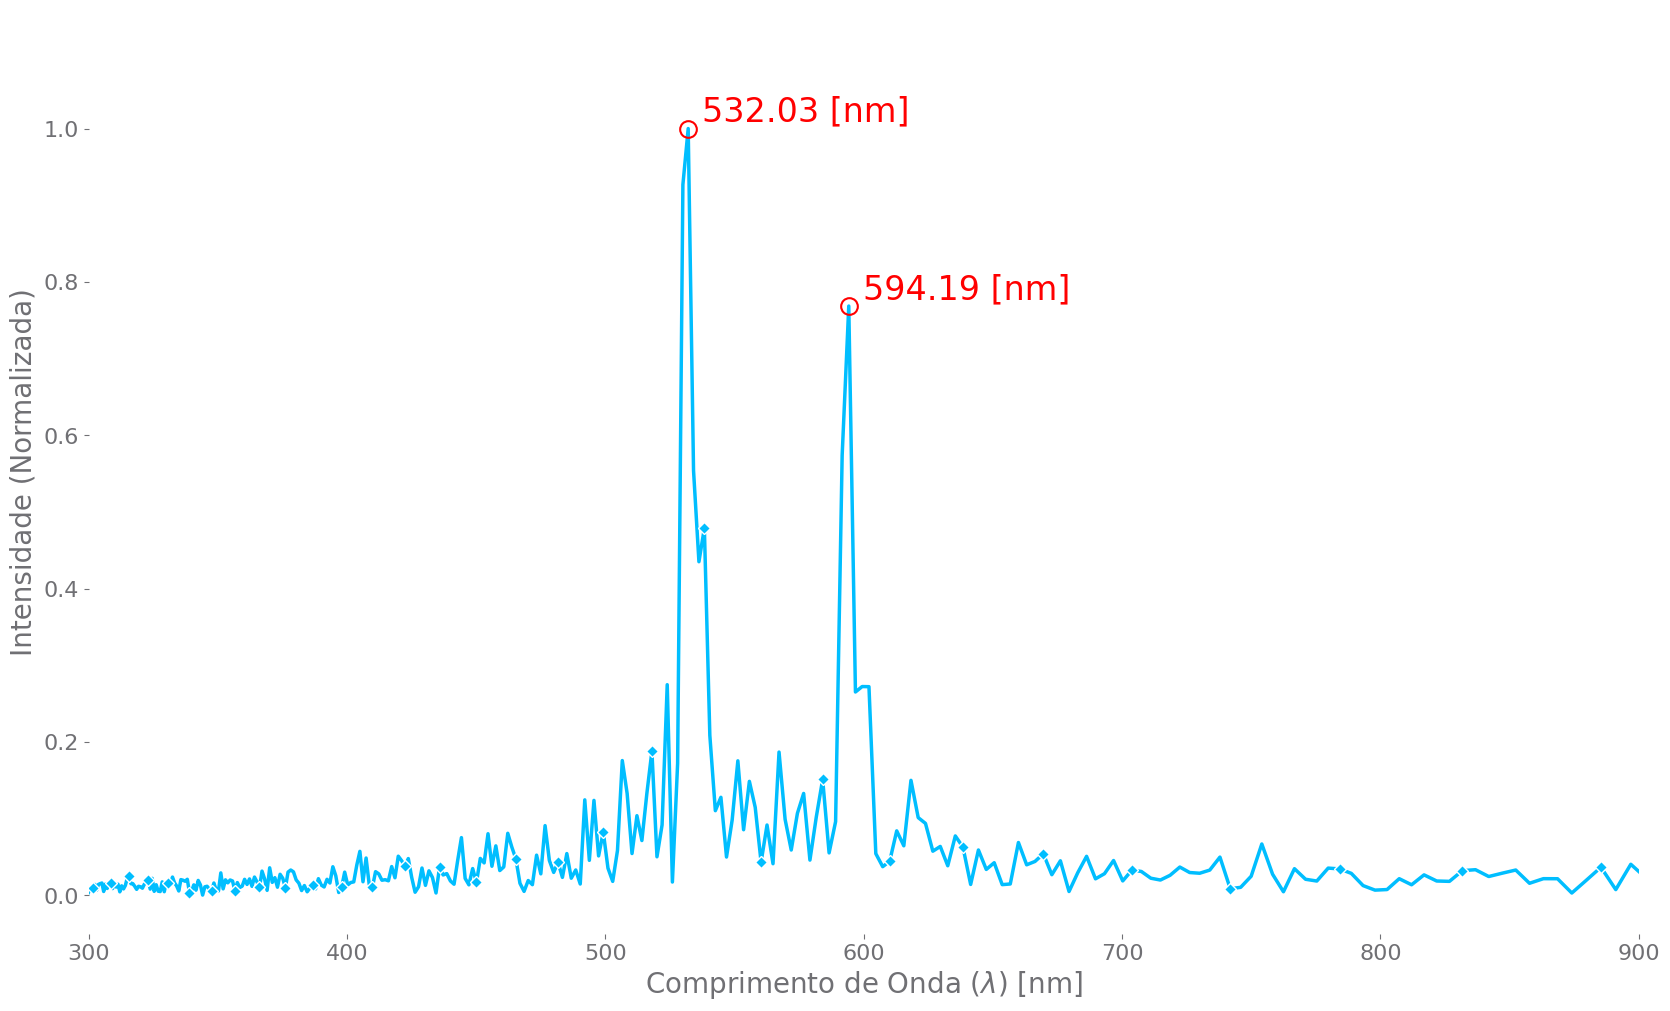

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Caminho do arquivo
caminho_do_arquivo = 'Gráficos para apresentação/Medida-7-L.A.Vd-18.09.2025-formatado.csv'

# Lê o arquivo CSV, atribui nomes às colunas e filtra os dados
df = pd.read_csv(caminho_do_arquivo, sep='  ', header=None, engine='python')
df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']
df_positivo = df[(df['lambda'] >= 200) & (df['lambda'] <= 1200)].copy()

# Normalização Min-Max
max_val = df_positivo['ft_abs'].max()
min_val = df_positivo['ft_abs'].min()
df_positivo['ft_abs_norm'] = (df_positivo['ft_abs'] - min_val) / (max_val - min_val)

# --- ENCONTRA OS PICOS ---
peaks, properties = find_peaks(df_positivo['ft_abs_norm'], height=0.5, distance=25, prominence=0.1)
lambda_picos = df_positivo['lambda'].iloc[peaks]
ft_abs_norm_picos = df_positivo['ft_abs_norm'].iloc[peaks]

# Imprime os resultados dos picos encontrados
print(f"Picos encontrados em lambda: {list(lambda_picos.round(2))}")
print(f"Com alturas normalizadas: {list(ft_abs_norm_picos.round(2))}")
# -------------------------


# --- PLOTAGEM ---


# 2. Plota a linha principal do sinal
plt.plot(df_positivo['lambda'], 
         df_positivo['ft_abs_norm'], 
         label='FT Absoluta Normalizada', 
         linestyle='-',       # Estilo da linha
         zorder=1,            # Ordem de plotagem (fundo)
         marker='D',          # Estilo do marcador
         markersize=6,        # Tamanho do marcador
         markevery=10)        # Densidade do marcador

# ------------------- MODIFICAÇÃO PRINCIPAL AQUI -------------------

# 3. Itera sobre cada pico para plotar, legendar e anotar individualmente
# Usamos zip para percorrer as coordenadas x (lambda) e y (intensidade) dos picos
for x_pico, y_pico in zip(lambda_picos, ft_abs_norm_picos):
    
    # Plota cada pico individualmente para criar uma entrada na legenda
    plt.plot(x_pico, y_pico, 
             marker='o',
             linestyle='None',
             markersize=12,
             markerfacecolor='none',
             markeredgecolor='red',
             markeredgewidth=1.5,
             # A label agora é específica para este pico
             label=f'Pico em {x_pico:.2f} nm',
             zorder=2)
    
    # Adiciona a anotação de texto ao lado de cada pico
    plt.annotate(f'{x_pico:.2f} [nm]',      # O texto a ser exibido
                 xy=(x_pico, y_pico),     # Ponto (x,y) a ser anotado
                 xytext=(10, 5),          # Deslocamento em pontos (10 para a direita, 5 para cima)
                 textcoords='offset points', # Sistema de coordenadas para o deslocamento
                 fontsize=24,          # Tamanho da fonte
                 color='red')

# -----------------------------------------------------------------

# 4. Customiza os títulos, rótulos e legenda
# plt.title("Valor abosluto da Transformada de Fourier normalizada")
plt.xlabel('Comprimento de Onda ($\lambda$) [nm]')
plt.ylabel('Intensidade (Normalizada)')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

plt.xlim(300,900)
# Aumenta um pouco o limite superior do eixo Y para dar espaço para as anotações
plt.ylim(top=plt.ylim()[1] * 1.1) 

# plt.legend(fontsize=12) # Ajustei o tamanho da fonte da legenda

# 5. Salva a figura antes de exibi-la
nome_saida = "ft_abs_norm_com_picos_anotados.png"
plt.savefig(nome_saida, dpi=300, bbox_inches='tight')
print(f"Gráfico salvo como '{nome_saida}' com sucesso!")

# 6. Exibe o gráfico na tela
plt.show()

Picos encontrados em lambda: [594.19, 532.03]
Com alturas normalizadas: [0.77, 1.0]


<>:64: SyntaxWarning: invalid escape sequence '\l'
<>:64: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_4914/2453205303.py:64: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('Comprimento de Onda ($\lambda$) [nm]')


Gráfico salvo como 'ft_com_inset_interferograma.png' com sucesso!


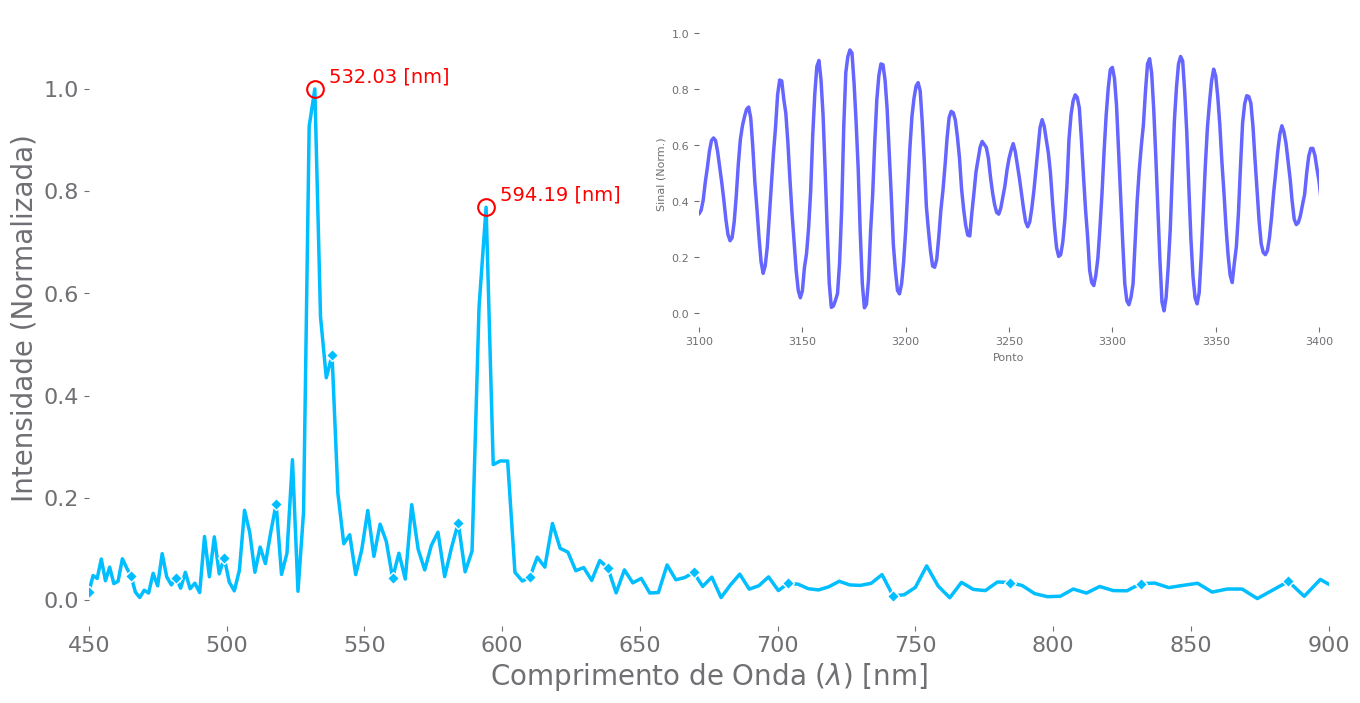

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Caminho do arquivo
caminho_do_arquivo = 'Gráficos para apresentação/Medida-7-L.A.Vd-18.09.2025-formatado.csv'

# Lê o arquivo CSV
df = pd.read_csv(caminho_do_arquivo, sep='  ', header=None, engine='python')
df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']

# ----------------- PREPARA O INTERFEROGRAMA -----------------
# Normalização Min-Max do interferograma
sinal_min, sinal_max = df['sinal'].min(), df['sinal'].max()
df['sinal_normalizado'] = (df['sinal'] - sinal_min) / (sinal_max - sinal_min)

# ----------------- PREPARA A FT -----------------
# Filtra intervalo de interesse
df_positivo = df[(df['lambda'] >= 200) & (df['lambda'] <= 1200)].copy()

# Normalização Min-Max da FT
max_val, min_val = df_positivo['ft_abs'].max(), df_positivo['ft_abs'].min()
df_positivo['ft_abs_norm'] = (df_positivo['ft_abs'] - min_val) / (max_val - min_val)

# Encontra os picos
peaks, properties = find_peaks(df_positivo['ft_abs_norm'], height=0.5, distance=25, prominence=0.1)
lambda_picos = df_positivo['lambda'].iloc[peaks]
ft_abs_norm_picos = df_positivo['ft_abs_norm'].iloc[peaks]

print(f"Picos encontrados em lambda: {list(lambda_picos.round(2))}")
print(f"Com alturas normalizadas: {list(ft_abs_norm_picos.round(2))}")

# ----------------- PLOT PRINCIPAL -----------------
fig, ax = plt.subplots(figsize=(16, 8))

# Curva principal da FT
ax.plot(df_positivo['lambda'], df_positivo['ft_abs_norm'],
        label='FT Absoluta Normalizada',
        linestyle='-',
        zorder=1,
        marker='D',
        markersize=6,
        markevery=10)

# Marca e anota os picos
for x_pico, y_pico in zip(lambda_picos, ft_abs_norm_picos):
    ax.plot(x_pico, y_pico,
            marker='o', linestyle='None',
            markersize=12,
            markerfacecolor='none',
            markeredgecolor='red',
            markeredgewidth=1.5,
            label=f'Pico em {x_pico:.2f} nm',
            zorder=2)
    ax.annotate(f'{x_pico:.2f} [nm]',
                xy=(x_pico, y_pico),
                xytext=(10, 5),
                textcoords='offset points',
                fontsize=14,
                color='red')

# Eixos principais
ax.set_xlabel('Comprimento de Onda ($\lambda$) [nm]')
ax.set_ylabel('Intensidade (Normalizada)')
ax.set_xlim(450, 900)
ax.set_ylim(top=ax.get_ylim()[1] * 1.1)

# ----------------- INSET: INTERFEROGRAMA -----------------
# Cria um eixo "inset" no canto superior direito
ax_inset = inset_axes(ax, width="50%", height="50%", loc="upper right")

# Plota o interferograma normalizado no inset
ax_inset.plot(df['ponto'], df['sinal_normalizado'], alpha=0.6, color='blue')

# Ajusta limites do inset
ax_inset.set_xlim(3100, 3400)
ax_inset.set_xlabel("Ponto", fontsize=8)
ax_inset.set_ylabel("Sinal (Norm.)", fontsize=8)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

# ----------------- SALVA E MOSTRA -----------------
nome_saida = "ft_com_inset_interferograma.png"
plt.savefig(nome_saida, dpi=300, bbox_inches='tight')
print(f"Gráfico salvo como '{nome_saida}' com sucesso!")

plt.show()
